# Support Vector Machines
## SVM - Regression

### Data
The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.


Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('cement_slump.csv')

In [25]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

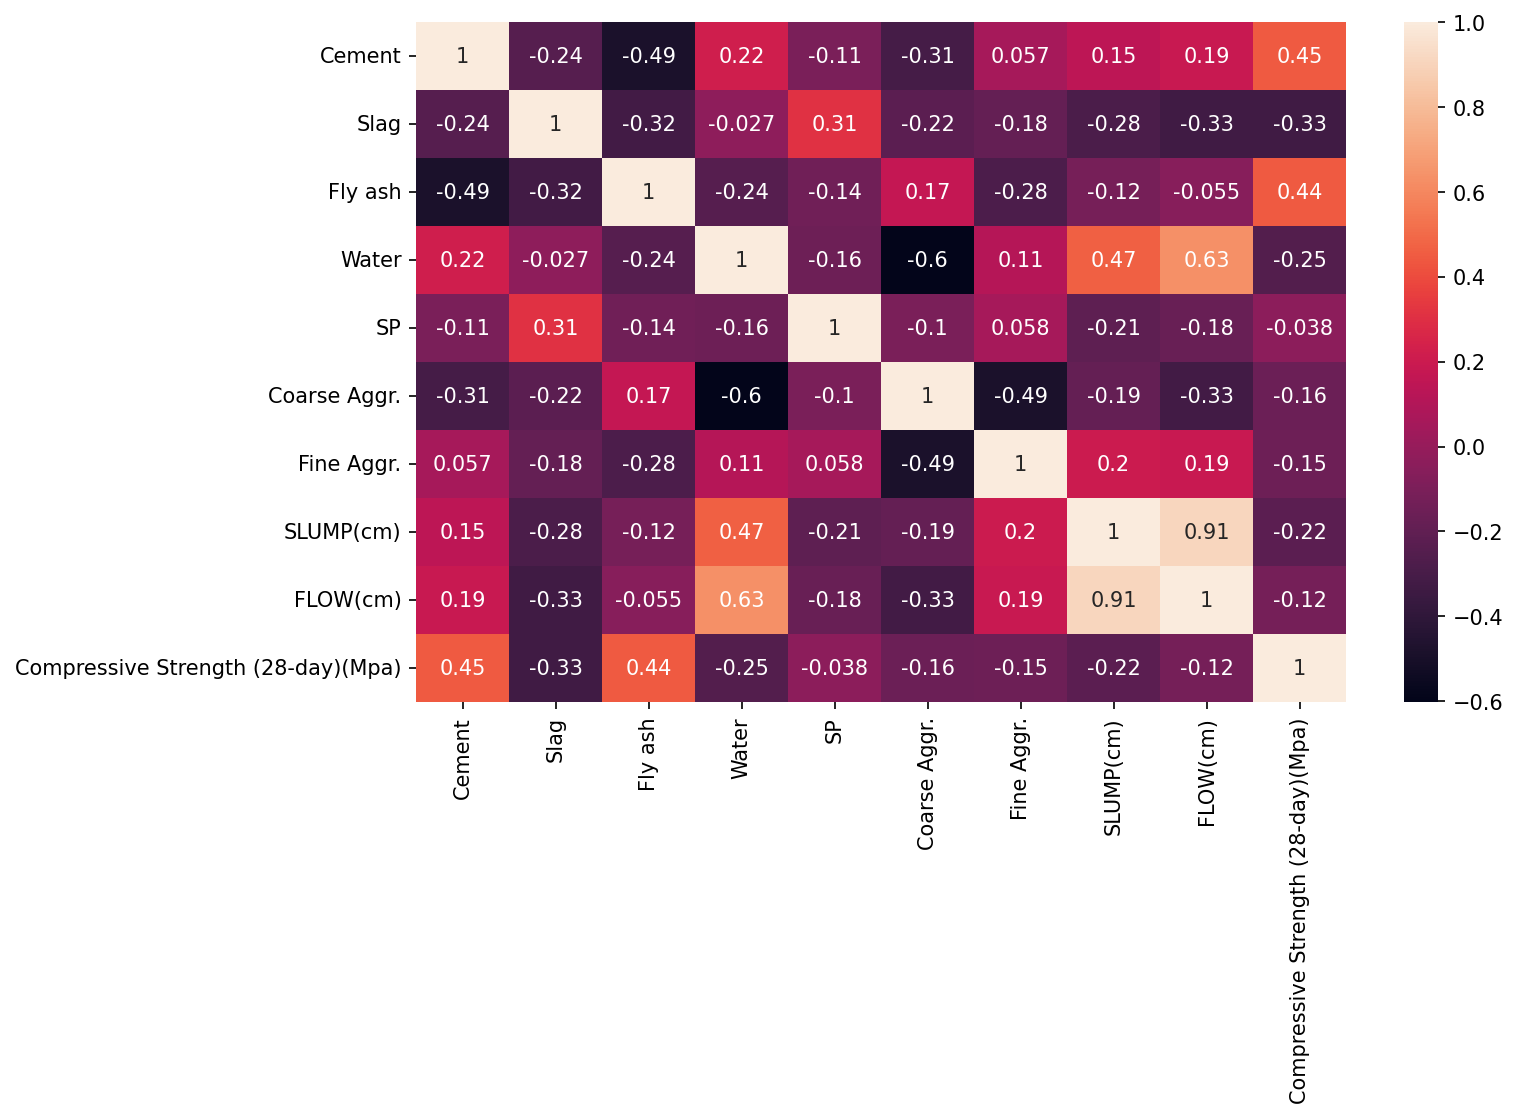

In [26]:
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
sns.heatmap(df.corr(),annot= True)

In [27]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

### Train | Test Split

In [28]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler 

In [32]:
scalar = StandardScaler()

In [33]:
scaled_X_train = scalar.fit_transform(X_train)

In [34]:
scaled_X_test = scalar.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR.

In [35]:
from sklearn.svm import SVR, LinearSVR

In [36]:
base_model = SVR() # default parameter

In [37]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [38]:
y_pred = base_model.predict(scaled_X_test)

### Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

5.236902091259178

In [43]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

6.695914838327133

### Grid Search in Attempt for Better Model

In [46]:
svm_model = SVR()

In [49]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [47]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid_model = GridSearchCV(estimator=svm_model, param_grid=param_grid)

In [51]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [53]:
y_pred= grid_model.predict(scaled_X_test)

### Evaluation

In [54]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2.5128012210762365

In [55]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

3.178210305119858